# Compute  PCA : Method 1 : Clustering and plot with 2 variables

- use PCA scikit learn from scikit learn

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/01/02
- last update : 2023/01/02

In [1]:
from itertools import cycle# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from mpl_toolkits.mplot3d import axes3d  

from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
import pandas as pd
from itertools import cycle, islice

from astroML.utils.decorators import pickle_results

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [3]:
from sklearn.cluster import KMeans

In [4]:
from astropy.io import fits
import copy

## Start

In [5]:
cwd=os.path.abspath("")
main_dir = cwd
print(f"notebook current executing path : {cwd}")

notebook current executing path : /Users/dagoret/MacOSX/GitHub/LSST/PhotoZ_PhD/Clustering


In [6]:
filename = "datatools/pcamethod1_SL_eigenvectorandcoeff.fits"
hdu = fits.open(filename)

In [7]:
hdu.info()

Filename: datatools/pcamethod1_SL_eigenvectorandcoeff.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   (6362, 553)   float64   
  1                1 ImageHDU         8   (10, 550)   float64   
  2                1 ImageHDU         8   (6361, 10)   float64   


In [8]:
data1=hdu[0].data
hdr1 = hdu[0].header
hdr1

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6362                                                  
NAXIS2  =                  553                                                  
EXTEND  =                    T                                                  
DATAWLS = 'data[0,1:]'                                                          
DATALLAV= 'data[1,1:]'                                                          
DATALLST= 'data[2,1:]'                                                          
DATAFL  = 'data[3:,1:]'                                                         
DATANUM = 'data[3:,0]'                                                          
COMMENT Spectra of StarLight                                                    

In [9]:
data2=hdu[1].data
hdr2 = hdu[1].header
hdr2

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   10                                                  
NAXIS2  =                  550                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COMMENT PCA method 1 spectra coefficients                                       

In [10]:
data3=hdu[2].data
hdr2 = hdu[2].header
hdr2

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6361                                                  
NAXIS2  =                   10                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COMMENT PCA method 1 Eigen Vectors                                              

In [11]:
NSED = data1.shape[0]-3
NWL = data1.shape[1]-1

In [12]:
wavelengths = data1[0,1:] 
flambdas_average = data1[1,1:] 
flambdas_std = data1[2,1:] 
spec = data1[3:,1:] 
all_numbers = data1[3:,0] 

In [13]:
#flux = dfluxnorm*flambdas_std +  flambdas_average

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_60130/1659706449.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'Flux average')

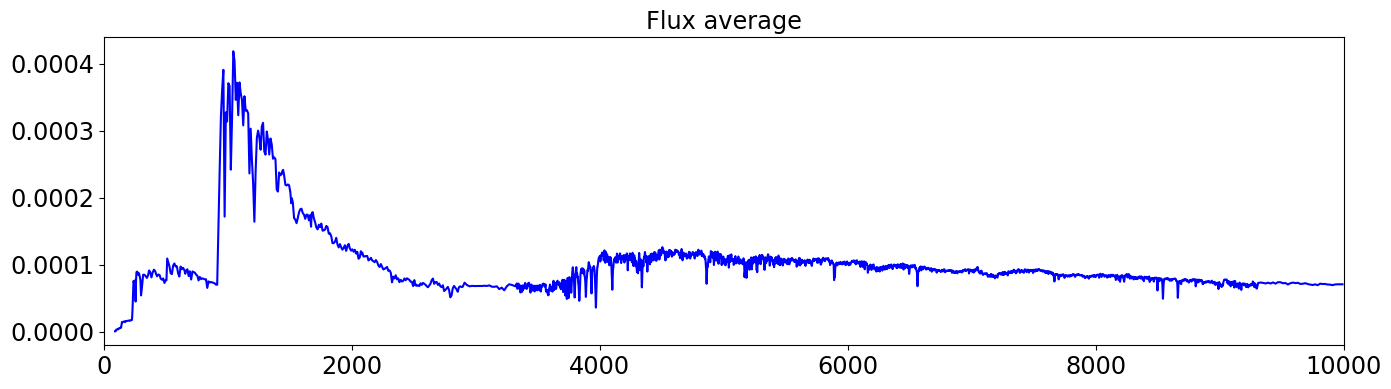

In [14]:
plt.figure(figsize=(16,4))
plt.plot(wavelengths,flambdas_average,'b-')
plt.xlim(0.,10000.)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title("Flux average")

In [15]:
spec.shape

(550, 6361)

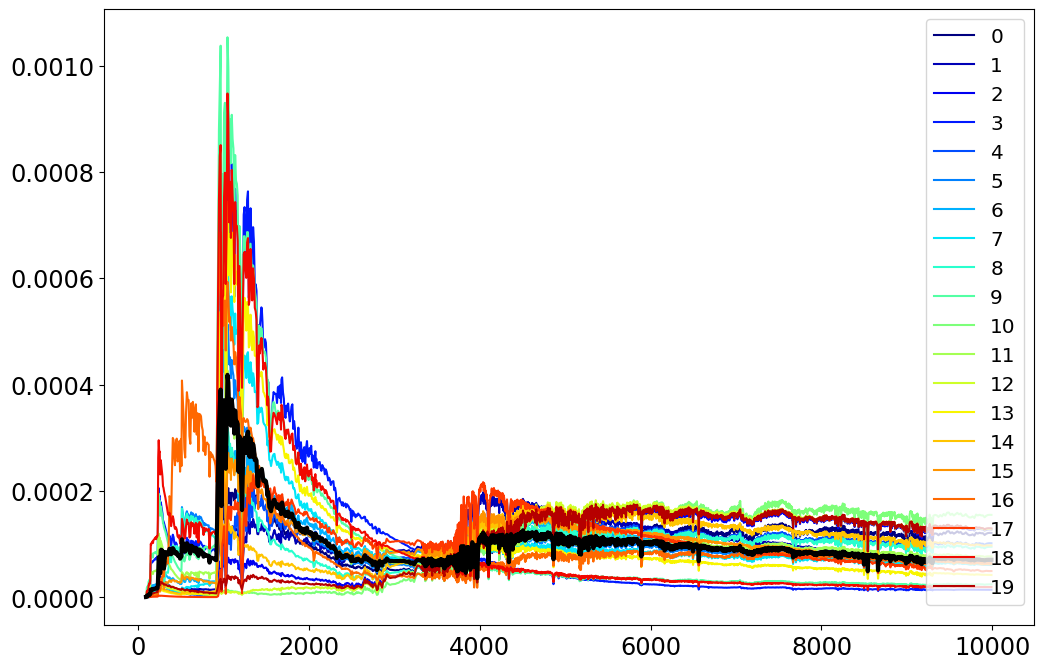

In [16]:
# wavelength bin colors
NTOPLOT=20
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)


fig = plt.figure(figsize=(12, 8))

for idx in np.arange(20):
    plt.plot(wavelengths,spec[idx,:],color=all_colors[idx],label=str(idx))

plt.legend()
spec_mean = spec.mean(0)
plt.plot(wavelengths,spec_mean,"k-",lw=3)
#plt.ylim(0,50.)

# Clustering

https://scikit-learn.org/stable/modules/clustering.html

## Clustering from PCA coefficients

In [17]:
#X = copy.deepcopy(data2[:,:5])
X = copy.deepcopy(data2[:,:2])

In [18]:
X.shape

(550, 2)

In [19]:
n_clu = 10
km = KMeans(n_clusters = n_clu)
estimator = km.fit(X)
print("centroids: ", km.cluster_centers_)
print("labels: ", km.labels_)

centroids:  [[-5.02369383e-03  1.15727291e-03]
 [ 4.10264382e-03 -6.82682205e-04]
 [-7.73960360e-05 -8.78422552e-04]
 [ 1.97582985e-03 -1.08706774e-03]
 [-4.87304474e-03 -9.72230941e-05]
 [ 6.04245289e-03  3.06081216e-03]
 [-2.40202748e-03  6.11379981e-04]
 [ 2.01605789e-03  8.73175557e-04]
 [ 5.47669696e-03  7.58036317e-04]
 [-2.71540261e-03 -1.59591685e-03]]
labels:  [6 9 0 8 6 2 2 3 6 8 0 2 0 3 6 2 7 9 8 0 7 4 8 3 0 3 2 8 9 2 6 2 2 1 3 3 1
 5 1 5 3 9 8 3 9 1 1 2 1 3 3 1 3 3 2 2 2 0 1 3 2 2 1 4 5 9 0 2 4 4 8 3 3 5
 2 3 0 6 4 4 0 5 1 2 0 1 4 4 9 2 4 5 3 9 4 7 9 0 1 6 4 0 6 7 7 4 0 6 4 2 8
 2 1 9 3 6 3 2 3 2 2 6 8 6 2 3 3 7 3 8 2 8 7 4 4 6 8 0 0 3 1 7 4 3 4 0 9 4
 8 9 4 8 8 4 9 0 0 3 2 5 2 2 8 3 1 0 3 4 2 3 0 3 7 3 2 2 3 3 3 0 0 1 3 6 2
 2 7 0 1 3 5 9 0 8 0 2 2 7 0 9 0 0 2 6 6 1 2 3 8 2 1 2 9 3 9 1 1 7 0 1 0 0
 8 0 4 6 7 8 3 4 3 6 3 0 6 9 2 1 1 1 0 8 7 2 3 3 0 3 7 9 3 5 0 3 0 3 3 9 1
 0 6 3 3 1 3 7 1 3 2 6 9 0 1 9 9 1 1 9 3 0 4 3 4 7 4 8 3 4 4 8 2 3 4 6 4 1
 4 4 9 1 2 6 5 4 4 1 8 8 1 8

/Users/dagoret/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
mydict = {i: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}
#my_dict = {km.cluster_centers_[i, 0]: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}

In [21]:
mydict

{0: array([  2,  10,  12,  19,  24,  57,  66,  76,  80,  84,  97, 101, 106,
        137, 138, 145, 155, 156, 165, 170, 179, 180, 187, 192, 194, 198,
        200, 201, 218, 220, 221, 223, 233, 240, 246, 252, 254, 259, 271,
        279, 325, 327, 328, 333, 334, 335, 337, 340, 341, 342, 348, 349,
        351, 355, 357, 372, 379, 384, 388, 389, 399, 405, 412, 419, 424,
        426, 427, 434, 453, 464, 465, 479, 481, 495, 499, 514, 523, 527,
        529, 531, 532, 549]),
 1: array([ 33,  36,  38,  45,  46,  48,  51,  58,  62,  82,  85,  98, 112,
        140, 164, 181, 188, 205, 210, 215, 216, 219, 237, 238, 239, 258,
        263, 266, 272, 275, 276, 295, 299, 305, 308, 312, 336, 361, 362,
        368, 369, 370, 371, 374, 380, 382, 395, 409, 416, 435, 440, 447,
        469, 478, 517, 528, 530, 534, 536, 538, 541, 543, 544, 547]),
 2: array([  5,   6,  11,  15,  26,  29,  31,  32,  47,  54,  55,  56,  60,
         61,  67,  74,  83,  89, 109, 111, 117, 119, 120, 124, 130, 158,
        160, 16

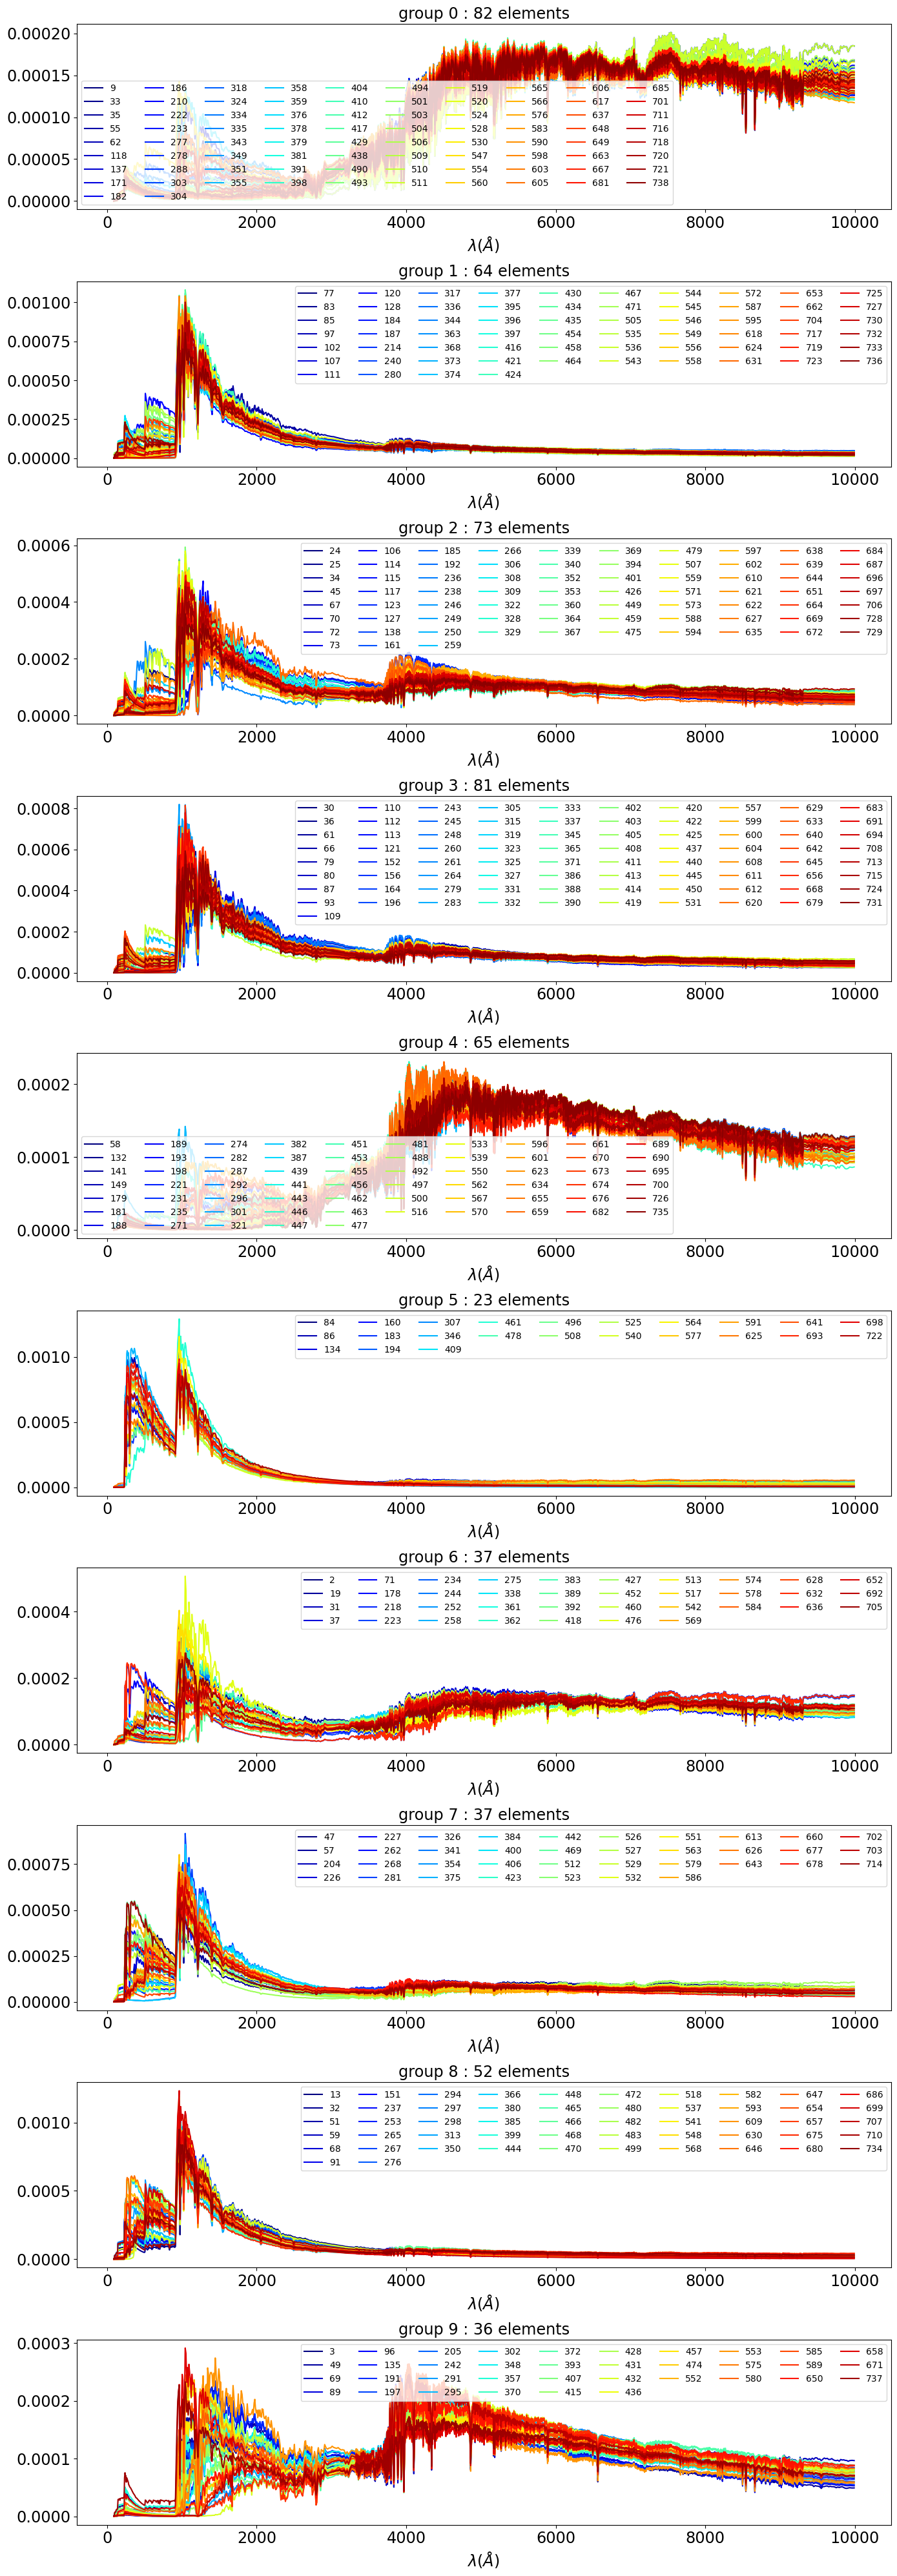

In [22]:
fig = plt.figure(figsize=(14, km.n_clusters*4))

for icluster in range(km.n_clusters):
    ax=fig.add_subplot(km.n_clusters,1,1+icluster)
    
    the_group = mydict[icluster]

    NTOPLOT=len(the_group)
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)
    
    icount=0
    for idx in the_group:
        the_num=all_numbers[idx]
        the_label=f"{the_num:.0f}"
        ax.plot(wavelengths,spec[idx,:],color=all_colors[icount],label=the_label)
        icount+=1
    ax.set_title(f"group {icluster} : {NTOPLOT} elements")
    ax.set_xlabel("$\lambda (\AA)$ ")
    ax.legend(loc="best",ncol=10,fontsize=10)
        
        
plt.tight_layout()
    


https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

In [23]:
reduced_data= X
kmeans=km
N=reduced_data.shape[0] 

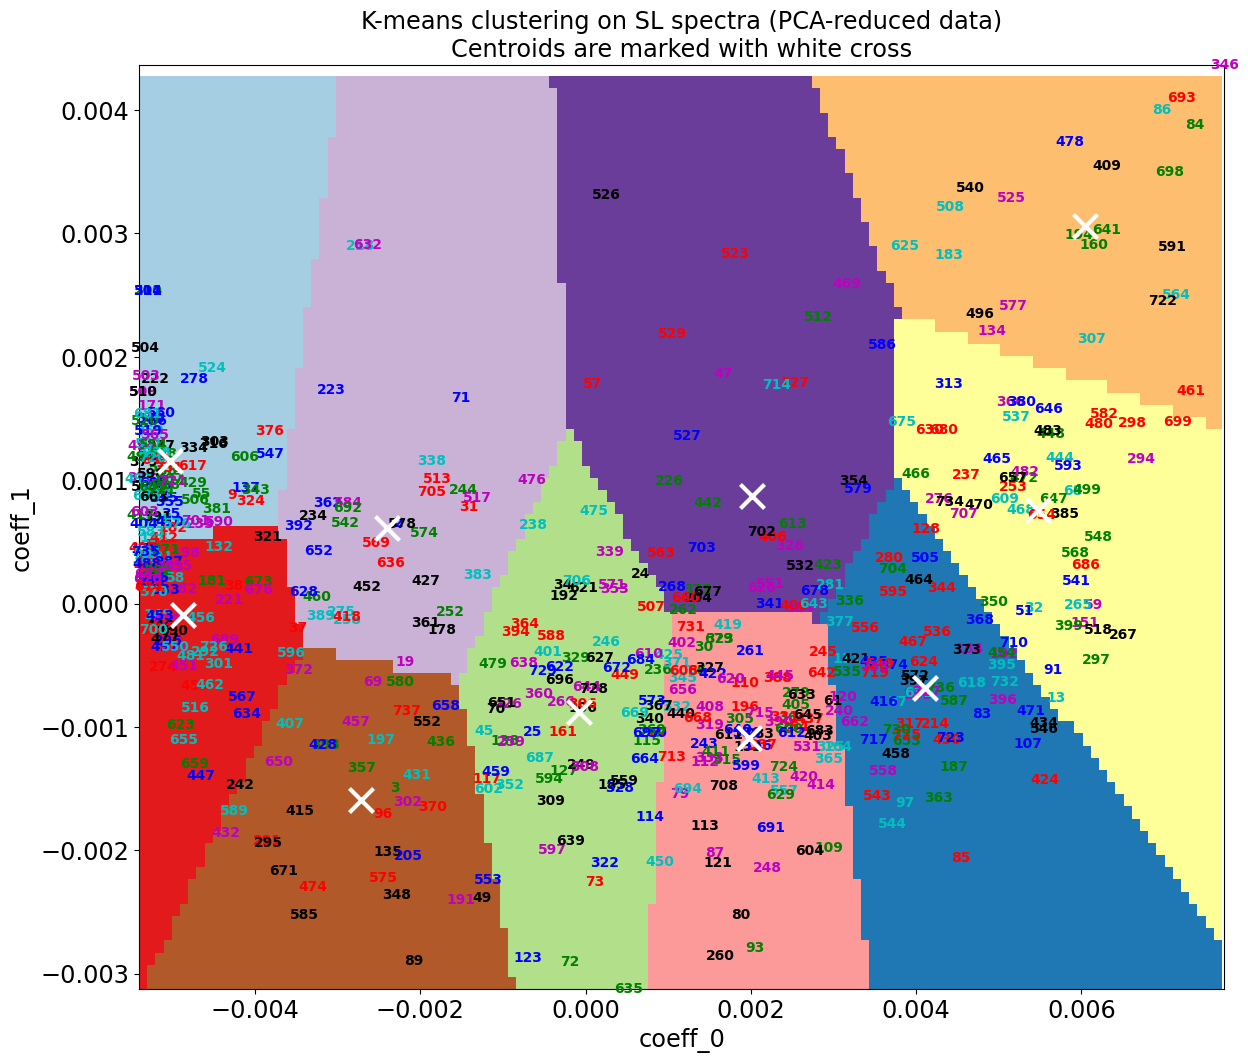

In [27]:
cycol = cycle('bgrcmk')

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.0001  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() , reduced_data[:, 0].max() 
y_min, y_max = reduced_data[:, 1].min() , reduced_data[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(14,12))
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

#plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

for cnt in range(N):
    the_num=int(all_numbers[cnt])
    plt.text(reduced_data[cnt, 0],reduced_data[cnt, 1],the_num, color=next(cycol),ha="center", va="center",fontsize=10,fontweight="bold")




# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=300,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on SL spectra (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xlabel("coeff_0")
plt.ylabel("coeff_1")
#plt.xticks(())
#plt.yticks(())
plt.show()
